<a href="https://colab.research.google.com/github/amarjit420/Astra-Vector-API/blob/main/Astra_Vector_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Astra Vector API

Jupyter notebook for image search powered by [Astra Vector Search](https://docs.datastax.com/en/astra-serverless/docs/vector-search/overview.html) and Hugging Face Sentence Transfromer [obrizum/all-MiniLM-L6-v2].


---

## Demo Summary
The demo uses Astra's Vector API alongside the transformer model, which generates embeddings for images. These embeddings, along with metadata, are stored in Astra DB.

The goal of the demo show how easy the API access is for storing vector collections and searching across them

---



## Transformer Model
This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

The model is intented to be used as a sentence and short paragraph encoder. Given an input text, it ouptuts a vector which captures the semantic information. The sentence vector may be used for information retrieval, clustering or sentence similarity tasks.






## Install Dependencies


 Package           | Details         
-------------------|:----------------
*`Astrapy`*   |A Python client driver connecting to Astra Vector database
*`Sentence Transformer`* | SentenceTransformers is a Python framework for sentence, text and image embeddings|
*`Pandas`* | Flexible and easy to use open source data analysis and manipulation package





In [3]:
!pip3 install astrapy matplotlib sentence-transformers pandas

# Imports

In [4]:
import os, json

from astrapy.db import AstraDB

from PIL import Image
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from getpass import getpass

# Astra Database creditials

Vector database credentials and API Endpoint


In [5]:
# Input your Astra API endpoint and token string, the one starting with "AstraCS:..."
ASTRA_DB_API_ENDPOINT = input("ASTRA_DB_API_ENDPOINT = ")
ASTRA_DB_APPLICATION_TOKEN = getpass("ASTRA_DB_APPLICATION_TOKEN = ")

ASTRA_DB_API_ENDPOINT = https://320f36a5-ad4a-4b65-b61d-54432c7ef3e5-us-east1.apps.astra.datastax.com
ASTRA_DB_APPLICATION_TOKEN = ··········


In [6]:
# Create the client

astra_db = AstraDB(
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    token=ASTRA_DB_APPLICATION_TOKEN,
)

# Create a collection for the vectors

this creates a collection called 'cheese_collection' of allowing vector dimension of size 384 to be stored.

In [12]:
response = astra_db.delete_collection("cheese_collection")
print(response)

{'status': {'ok': 1}}


In [13]:
collection = astra_db.create_collection("cheese_collection", dimension=384)
print(collection)

Astra DB Collection[name="cheese_collection", endpoint="https://320f36a5-ad4a-4b65-b61d-54432c7ef3e5-us-east1.apps.astra.datastax.com"]


# Review data model


The sample data is in the format

```
    {
        "name": "Brie",
        "description": "Brie is the best known French cheese and has the nickname ....",
        "country_origin": "France",
        "aroma": "pronounced, strong",
        "image": "https://www.cheese.com/media/img/cheese/Brie_PDCo3RG.jpg"
    },
```




**Load the model**

This is a pretrained model and fine-tuned in on a 1B sentence pair dataset.

Given an input text, the model ouptuts a vector which captures the semantic information. The sentence vector may be used for information retrieval, clustering or sentence similarity tasks.

In [14]:
model = SentenceTransformer('obrizum/all-MiniLM-L6-v2')


.gitattributes:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

# Simple test

In [15]:
text_emb = model.encode("Astra DB Vector API is awesome!")
print(f"model provided embeddings for the string: '. {text_emb.tolist()}")
print(f"vector size:  {len(text_emb)}")


model provided embeddings for the string: '. [-0.08397846668958664, -0.05097135901451111, -0.13223738968372345, 0.06674640625715256, -0.040942370891571045, -0.04005603492259979, -0.036654070019721985, -0.01482242438942194, -0.0472005195915699, -0.02615613117814064, -0.03653447702527046, 0.009811349213123322, 0.04780180752277374, -0.012780480086803436, -0.005954676773399115, 0.03814760595560074, 0.02847021445631981, 0.027449337765574455, 0.0702049657702446, -0.015958068892359734, -0.07550383359193802, -0.010878460481762886, -0.011285627260804176, 0.02184126153588295, 0.11980198323726654, -0.01132133137434721, -0.009238528087735176, -0.05743316188454628, 0.01979529671370983, -0.10793107002973557, -0.012015041895210743, 0.008715203031897545, -0.042521219700574875, 0.10221011936664581, -0.13979695737361908, 0.013589737936854362, 0.00721754040569067, -0.05074882134795189, -0.0884782001376152, -0.02276778034865856, -0.029242292046546936, 0.006085419561713934, -0.08321979641914368, 0.00943072

# Load the JSON test data

In [38]:
import json
import requests

def clean_description(text):
    # Remove carriage returns and newlines
    cleaned_text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove commas and special characters
    cleaned_text = ''.join(char for char in cleaned_text if char.isalnum() or char.isspace())
    #return cleaned_text[:250]  # Limit description to 250 characters after cleaning
    return cleaned_text[:250]  # Limit description to 250 characters after cleaning


# Function to extract image URLs from the description text
def extract_image_urls(description):
    words = description.split()
    image_urls = [word for word in words if word.startswith("https://") and word.endswith(".jpg")]
    return image_urls[0] if image_urls else 'Image URL not found'

image_data = []

# Use the raw GitHub URL to get the actual JSON content
response = requests.get('https://raw.githubusercontent.com/amarjit420/Vector_Demos/main/Data/cheese_data.json')
response.raise_for_status()  # This will raise an error if the request failed
cheese_data = response.json()

# Fix the indentation for the loop
for index, cheese_entry in enumerate(cheese_data, start=1):
    name = cheese_entry.get('name', 'Unknown')
    description = clean_description(cheese_entry.get('description', 'No description available'))
    country_origin = cheese_entry.get('country_origin', 'Unknown')
    aroma = cheese_entry.get('aroma', 'Unknown')
    image_url = extract_image_urls(cheese_entry.get('image', ''))

    # Place holder embedding
    embedding = '1111.1111'

    # Create the image_data structure
    image_data.append((index, name, description, aroma, country_origin, image_url, embedding))

# Pretty print the image_data
print(json.dumps(image_data, indent=4))



[
    [
        1,
        "Gouda",
        "Gouda as the locals say is a Dutch cheese named after the city of Gouda in the Netherlands The taste can vary depending on its aging process It is the most popular Dutch cheese in the world accounting for 50 to 60 of the worlds cheese consumption Sin",
        "Unknown",
        "Netherlands",
        "https://www.cheese.com/media/img/cheese/GOUDA_SqYJjRh.jpg",
        "1111.1111"
    ],
    [
        2,
        "Brie",
        "Brie cheese is a soft and creamy French cheese known for its mild buttery flavour It is named after the Brie region in France where it originated Brie is traditionally made from cows milk and is often produced in large wheels or rounds Brie is a soft",
        "buttery, mild",
        "France",
        "https://www.cheese.com/media/img/cheese/Brie_PDCo3RG.jpg",
        "1111.1111"
    ],
    [
        3,
        "American Cheese",
        "American cheese often found in households and restaurants across the United St

## Insert data

Insert the sample JSON data with the vector embedding into Astra table


In [51]:

# Convert image_data to the desired JSON structure
v_doc_list = []
for cheese_info in image_data:
    _id, name, description, _, _, _, _ = cheese_info  # Unpack cheese information
    embedding = model.encode(name).tolist()  # Generate embedding for the cheese name

    # Create a dictionary for each cheese
    cheese_dict = {
        "_id": str(_id),
        "name": name,
        #"description": description.split('.')[0],  # Taking the first sentence as description
        "description": description[:20],  # Taking the 20 character as description
        "$vector": embedding,
    }
    v_doc_list.append(cheese_dict)


# Pretty print the image_data
print(json.dumps(v_doc_list, indent=4))

[
    {
        "_id": "1",
        "name": "Gouda",
        "description": "Gouda as the locals ",
        "$vector": [
            0.030271485447883606,
            -0.010784965939819813,
            -0.05597636103630066,
            0.006406696047633886,
            -0.08654125779867172,
            0.021574849262833595,
            0.08221589028835297,
            -0.0050795129500329494,
            -0.014047316275537014,
            -0.0551614835858345,
            0.10006481409072876,
            -0.04404616728425026,
            -0.03205014020204544,
            0.022445641458034515,
            0.015694811940193176,
            -0.05096999183297157,
            0.02407393604516983,
            -0.12951543927192688,
            0.02154112607240677,
            -0.03000221587717533,
            -0.022358648478984833,
            0.06121295690536499,
            -0.021191203966736794,
            -0.00537205720320344,
            -0.06006878986954689,
            0.063595697283744

# For testing select only 20 records

In [52]:
# Select the first 20 elements from image_data
selected_data = v_doc_list[:20]

# Convert the selected data to JSON format
json_data = json.dumps(selected_data)

# Pretty print the image_data
print(json.dumps(json_data, indent=4))

"[{\"_id\": \"1\", \"name\": \"Gouda\", \"description\": \"Gouda as the locals \", \"$vector\": [0.030271485447883606, -0.010784965939819813, -0.05597636103630066, 0.006406696047633886, -0.08654125779867172, 0.021574849262833595, 0.08221589028835297, -0.0050795129500329494, -0.014047316275537014, -0.0551614835858345, 0.10006481409072876, -0.04404616728425026, -0.03205014020204544, 0.022445641458034515, 0.015694811940193176, -0.05096999183297157, 0.02407393604516983, -0.12951543927192688, 0.02154112607240677, -0.03000221587717533, -0.022358648478984833, 0.06121295690536499, -0.021191203966736794, -0.00537205720320344, -0.06006878986954689, 0.06359569728374481, 0.043764762580394745, -0.08200683444738388, -0.024741364642977715, -0.08576475083827972, 0.02387513406574726, 0.02790386602282524, -0.008350000716745853, -0.03436571732163429, -0.07832511514425278, -0.05330364406108856, -0.004582136403769255, -0.018887683749198914, -0.010424165055155754, 0.06536276638507843, -0.03505092114210129, 

# Insert collection

Bulk insert the data

In [53]:
response = collection.insert_many(selected_data)
print(response)

{'status': {'insertedIds': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']}}


# Check data in Astra console

Under the data explorer it will show:

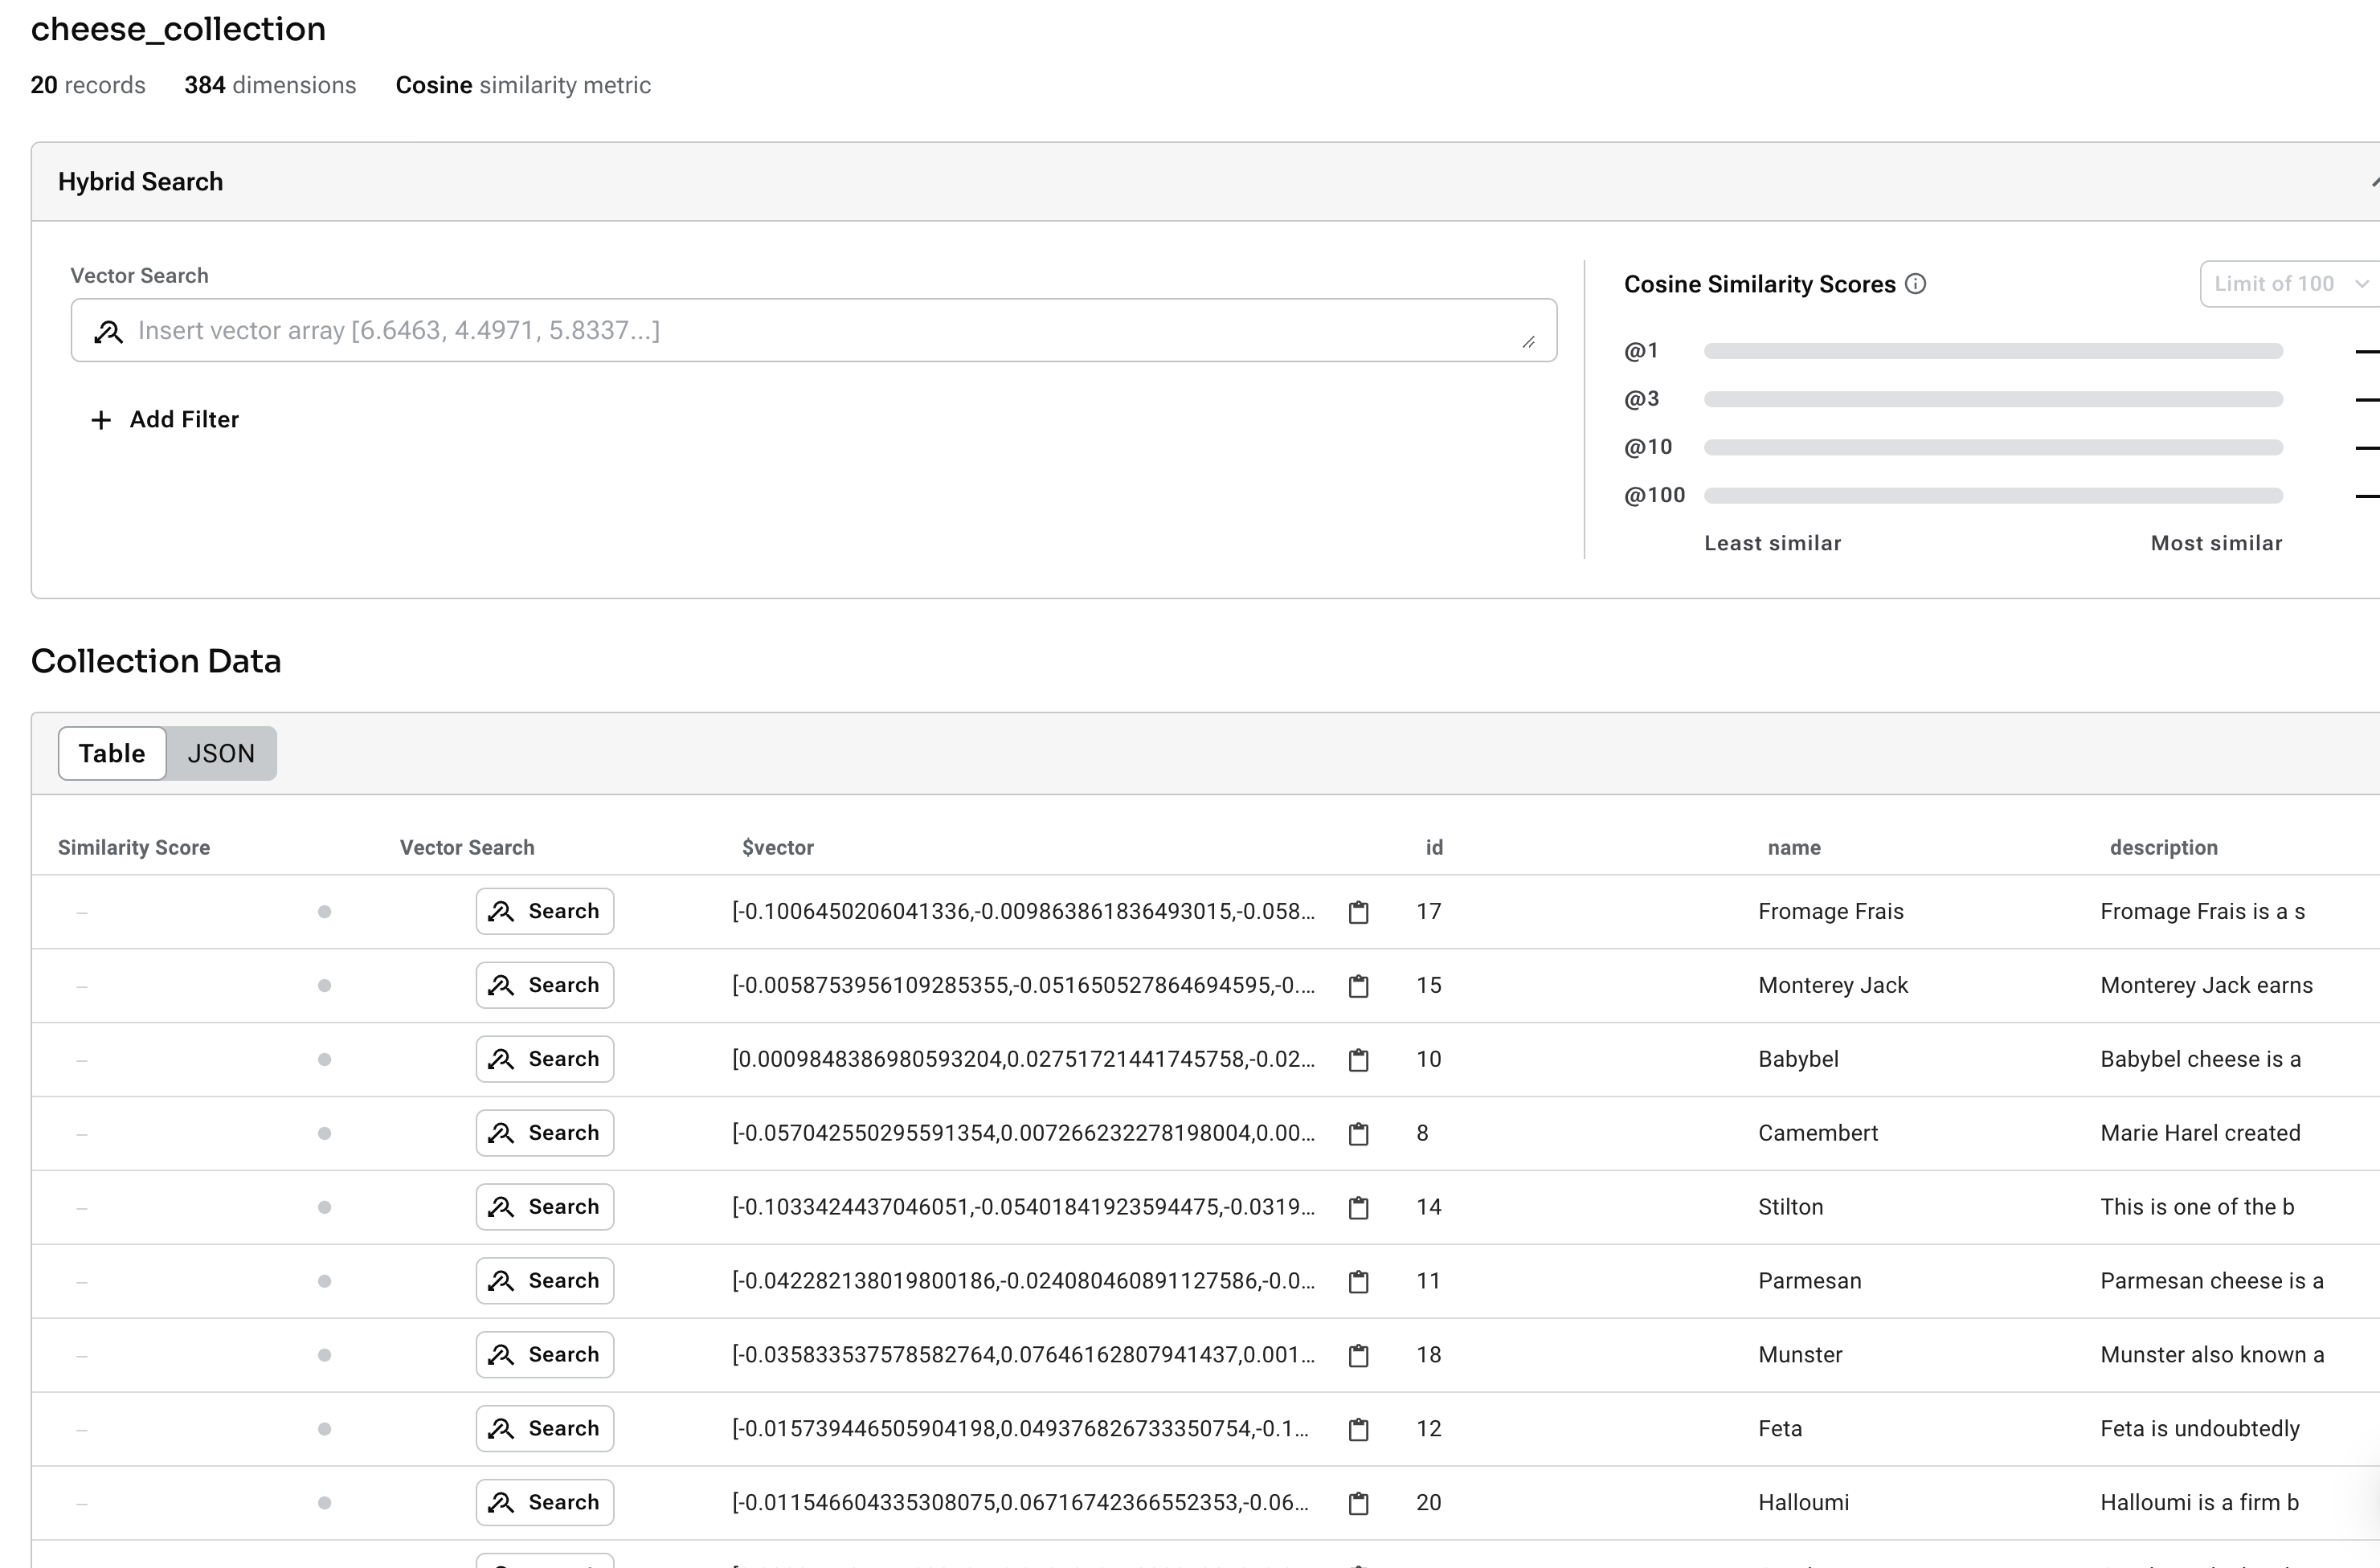

## Find a document by ID





In [54]:
document = collection.find_one(filter={"_id":"2"})
print(document)

{'data': {'document': {'_id': '2', 'name': 'Brie', 'description': 'Brie cheese is a sof', '$vector': [-0.0661315768957138, -0.02267250046133995, 0.03445767983794212, -0.05804522708058357, 0.0116286501288414, -0.01552326139062643, 0.11275678128004074, -0.01952391304075718, -0.03728114068508148, -0.03671287000179291, -0.02801929973065853, -0.15322396159172058, 0.017405465245246887, -0.04677498713135719, 2.0932589904987253e-05, 0.04270051047205925, -0.05519913136959076, -0.01928878389298916, -0.09709787368774414, -0.022928869351744652, -0.07639628648757935, 0.03077252209186554, -0.042836613953113556, 0.03031122125685215, -0.023661723360419273, 0.02892693318426609, 0.13433332741260529, 0.03860786184668541, 0.004435667302459478, -0.046410322189331055, 0.024795683100819588, 0.031264495104551315, 0.03170455992221832, -0.006416103802621365, -0.021221665665507317, -0.05545973777770996, 0.02689400501549244, -0.06915099173784256, 0.1286482959985733, 0.05164359509944916, -0.033738259226083755, -0.

## Find document by non vector filter clause




In [55]:
document = collection.find_one(filter={"name":"Parmesan"})
print(document)

{'data': {'document': {'_id': '11', 'name': 'Parmesan', 'description': 'Parmesan cheese is a', '$vector': [-0.042282138019800186, -0.024080460891127586, -0.029374221339821815, -0.043692447245121, -0.012954242527484894, -0.04920625314116478, 0.08725868910551071, 0.025773480534553528, 0.017375752329826355, -0.03332286700606346, 0.07257867604494095, -0.08056671917438507, -0.037801072001457214, 0.006597386207431555, 0.01189105212688446, 0.017245125025510788, -0.02342970110476017, -0.01120305247604847, 0.043924443423748016, -0.04411928728222847, -0.047661252319812775, 0.009879808872938156, -0.074457548558712, 0.024233125150203705, 0.0372970886528492, 0.037596866488456726, 0.040086571127176285, 0.02436697483062744, -0.009841077029705048, -0.04708617553114891, 0.04678996652364731, -0.03809135779738426, 0.08848639577627182, 0.040744636207818985, -0.036171987652778625, 0.08960933238267899, -0.019539691507816315, 0.021405404433608055, 0.06257957965135574, 0.011745448224246502, -0.074901558458805

# Find document by vector similarity

In [79]:
import numpy as np

query_string = "United States"

text_emb = model.encode(query_string)

print(text_emb)

numpy_array = np.array(text_emb)
print(numpy_array)

documents = collection.vector_find(numpy_array, limit=1)
for document in documents:
    print(f"\n{document}")

[ 6.43062964e-02 -2.33028503e-03  2.98110815e-03  4.35454771e-02
 -1.11299399e-02 -4.40650480e-03  4.06845920e-02 -5.30164316e-02
 -1.31875994e-02  1.52671468e-02  2.87639592e-02 -3.88368852e-02
  3.56810354e-02 -3.90757388e-03 -5.00171371e-02 -2.74795257e-02
  3.67219895e-02 -6.92948624e-02 -7.63248652e-02 -3.56968567e-02
  4.55980971e-02  4.22844514e-02  2.49422528e-02  2.55445428e-02
  1.70397740e-02  4.88409884e-02 -1.03552053e-02  1.96197797e-02
  1.43664628e-02 -1.05573691e-01 -1.94432903e-02 -4.29959111e-02
  4.39459495e-02 -2.23485008e-02 -8.49741697e-03 -5.13460301e-02
  2.58901305e-02 -2.35639140e-02  2.46173944e-02 -2.47332025e-02
  1.04834922e-02 -6.20124638e-02  1.55804027e-02  5.38449641e-03
  1.85555741e-02  6.99311644e-02  6.40683025e-02  3.87638099e-02
 -1.31109520e-03  5.65051101e-02  4.98712212e-02  5.17459363e-02
 -5.28979395e-03  2.13206727e-02  3.60741802e-02  3.28765786e-03
  2.05322471e-03  6.82278723e-02 -1.39999334e-02 -5.03620505e-03
 -6.25494169e-04 -3.35553

ValueError: ignored